<a href="https://colab.research.google.com/github/giorgiodemarchi/Brain-Tumor-Detection-CNN-vs-ViT/blob/main/EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/giorgiodemarchi/Brain-Tumor-Detection-CNN-vs-ViT.git

Cloning into 'Brain-Tumor-Detection-CNN-vs-ViT'...
remote: Enumerating objects: 4067, done.
remote: Counting objects: 100% (3/3), done.
remote: Compressing objects: 100% (2/2), done.
remote: Total 4067 (delta 0), reused 3 (delta 0), pack-reused 4064
Receiving objects: 100% (4067/4067), 92.24 MiB | 14.06 MiB/s, done.
Resolving deltas: 100% (3/3), done.
Updating files: 100% (4603/4603), done.


# Exploratory Data Analysis

In [38]:
import pandas as pd
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

In [31]:
df = pd.read_csv('Brain-Tumor-Detection-CNN-vs-ViT/metadata.csv', index_col=0)
df.head()

,image,class,format,mode,shape
0,Cancer (1).jpg,tumor,JPEG,RGB,"(512, 512, 3)"
1,Cancer (1).png,tumor,PNG,L,"(300, 240)"
2,Cancer (1).tif,tumor,TIFF,RGB,"(256, 256, 3)"
3,Cancer (10).jpg,tumor,JPEG,RGB,"(512, 512, 3)"
4,Cancer (10).tif,tumor,TIFF,RGB,"(256, 256, 3)"


Load data:

In [34]:
def load_image(image_path):
    with Image.open(image_path) as img:
        return img.copy()

df = df.iloc[:-1]  # Drop last row

df['image_data'] = None # Initialize column

# Read image data
for i, row in df.iterrows():
  label = row['class']
  path = row['image']

  if label == 'tumor':
      image_path = "Brain-Tumor-Detection-CNN-vs-ViT/Brain Tumor Data Set//Brain Tumor Data Set/Brain Tumor/" + path
  else:
      image_path = "Brain-Tumor-Detection-CNN-vs-ViT/Brain Tumor Data Set//Brain Tumor Data Set/Healthy/" + path

  df.loc[i, 'image_data'] = load_image(image_path)

<ipython-input-34-5029d9ec7fd4>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['image_data'] = None # Initialize column
<ipython-input-34-5029d9ec7fd4>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[i, 'image_data'] = load_image(image_path)


In [36]:
df['class'].value_counts()

tumor     2513
normal    2085
Name: class, dtype: int64

See some examples

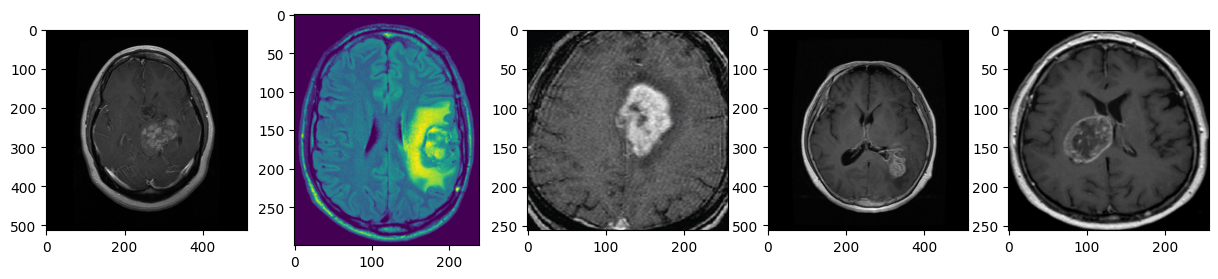

In [49]:
# Tumor examples

fig, ax = plt.subplots(1,5, figsize=(15,3))

for i in range(5):  # Loop through the first five entries
  img = df[df['class']=='tumor'].loc[i, 'image_data']  # Get the image object
  ax[i].imshow(img)

plt.show()

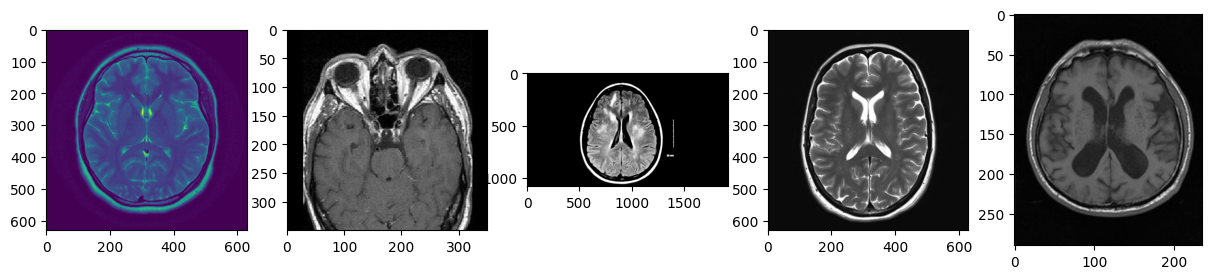

In [48]:
# Tumor examples

fig, ax = plt.subplots(1,5, figsize=(15,3))

for i in range(5):  # Loop through the first five entries
  img = df[df['class']=='normal'].iloc[i]['image_data']  # Get the image object
  ax[i].imshow(img)